In [1]:
!pip install numpy pandas sklearn matplotlib seaborn

In [2]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
df = pd.read_csv('output_file.csv')

feat_cols = df.columns[:-1]
print(feat_cols)

print('Size of the dataframe: {}'.format(df.shape))

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'x374', 'x375', 'x376', 'x377', 'x378', 'x379', 'x380', 'x381', 'x382',
       'x383'],
      dtype='object', length=384)
Size of the dataframe: (14, 385)


In [4]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [5]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29804632 0.1816783  0.15418413]


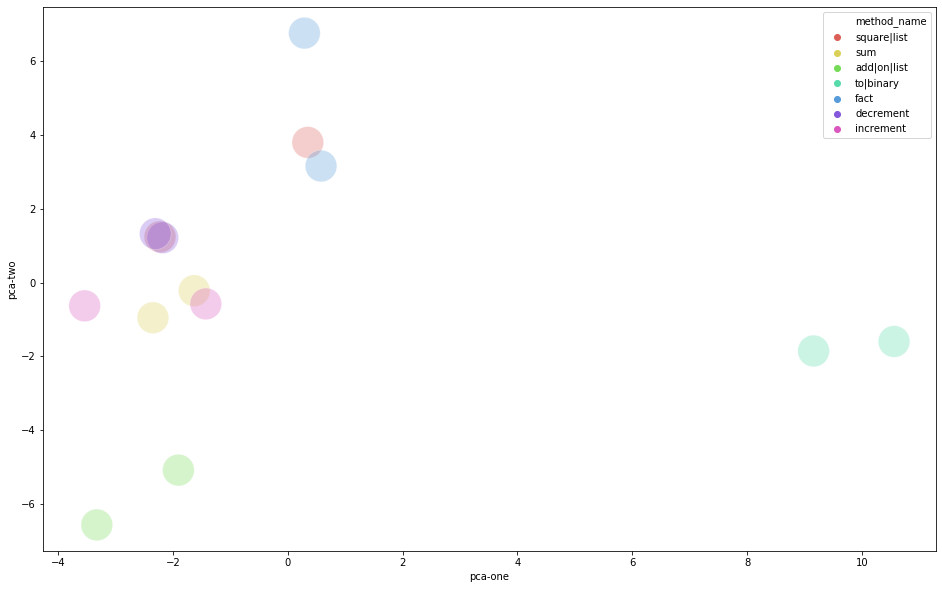

In [6]:
fig = plt.figure(figsize=(16,10))
method_name_count = df['method_name'].nunique()
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="method_name",
    palette=sns.color_palette("hls", method_name_count),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3,
    s=1000
)

In [10]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29804632 0.1816783  0.15418413]


In [11]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 14 samples in 0.000s...
[t-SNE] Computed neighbors for 14 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.377327
[t-SNE] KL divergence after 300 iterations: 0.378345
t-SNE done! Time elapsed: 0.09955906867980957 seconds


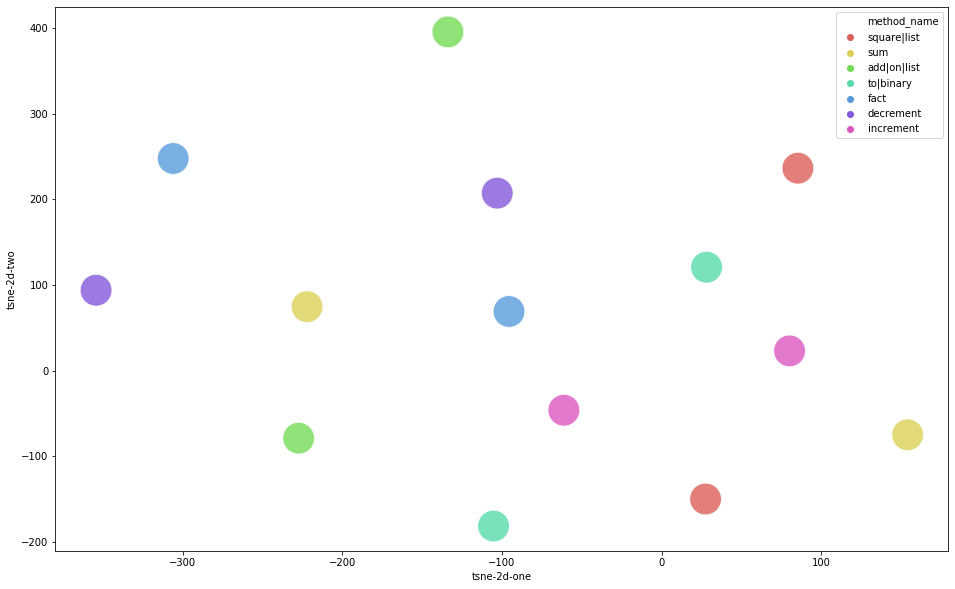

In [14]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="method_name",
    palette=sns.color_palette("hls", method_name_count),
    data=df_subset,
    legend="full",
    alpha=0.8,
    s=1000
)

In [15]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=14 with svd_solver='full'